##Capstone 2

#Context
Interested in the Indian startup ecosystem just like me? Wanted to know what type of startups are getting funded in the last few years? Wanted to know who are the important investors? Wanted to know the hot fields that get a lot of funding these days?
This dataset is a chance to explore the Indian start up scene. Deep dive into funding data and derive insights into the future!

#Content
This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).
 
Data is not commited to the repo, can be found under the below location
https://www.kaggle.com/sudalairajkumar/indian-startup-funding

## This project basically projects answers to the below queries :-
1.  How does the funding ecosystem change with time ?(Number of funding per month)
2. How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)
3. Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?
4. Do cities play a major role in funding ? (OR) Which city has maximum startups ?
5. Who is the important investors in the Indian Ecosystem?
6. What are different types of funding for startups ?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()
import squarify
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999


## Obtaining the data

In [2]:
funding_data = pd.read_csv("startup_funding.csv")
funding_data

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


### Column names of the table

In [3]:
funding_data.columns

Index(['SrNo', 'Date', 'StartupName', 'Industry Vertical', 'SubVertical',
       'CityLocation', 'Investors Name', 'InvestmentType', 'AmountinUSD',
       'Remarks'],
      dtype='object')

In [4]:
print("Size of data(Rows, Columns)",funding_data.shape)

Size of data(Rows, Columns) (3044, 10)


How much data is missing

In [5]:
# missing data 
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,2625,86.235217
AmountinUSD,960,31.537451
SubVertical,936,30.749014
CityLocation,180,5.913272
Industry Vertical,171,5.617608


In [6]:
del funding_data["Remarks"]
funding_data.head()

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


Now convert the string **"AmountInUSD" **into numeric

In [7]:
funding_data=funding_data[funding_data.AmountinUSD.str.lower() != 'undisclosed']
funding_data=funding_data[funding_data.AmountinUSD.str.lower() != 'unknown']
funding_data["AmountinUSD"] = funding_data["AmountinUSD"].apply(lambda x: str(x).replace(",",""))
funding_data["AmountinUSD"] = pd.to_numeric(funding_data["AmountinUSD"],errors='coerce')
funding_data.head()

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


## Ques 1:  How does the funding ecosystem change with time ?(Number of funding per month)

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


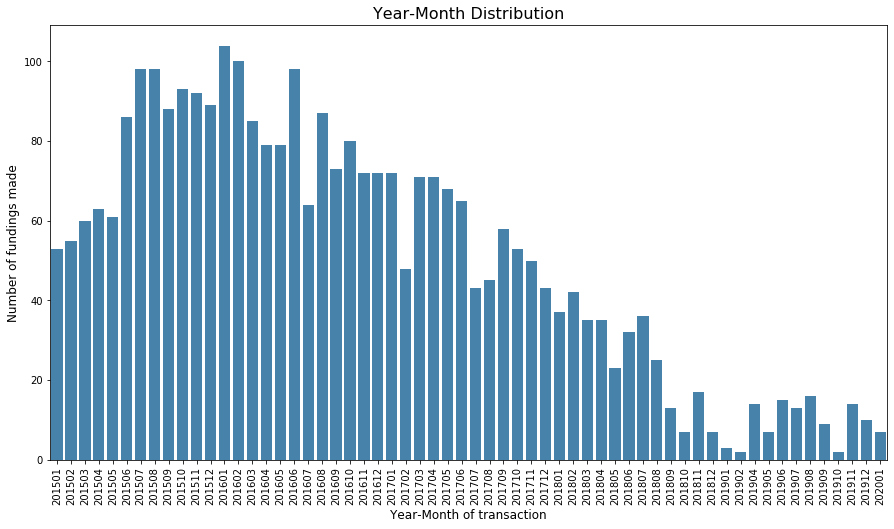

In [27]:

funding_data['Date'][funding_data['Date']=='12/05.2015'] = '12/05/2015'
funding_data['Date'][funding_data['Date']=='13/04.2015'] = '13/04/2015'
funding_data['Date'][funding_data['Date']=='15/01.2015'] = '15/01/2015'
funding_data['Date'][funding_data['Date']=='22/01//2015'] = '22/01/2015'
funding_data['Date'][funding_data['Date']=='05/072018'] = '05/07/2018'
funding_data['Date'][funding_data['Date']=='01/07/015'] = '01/07/2015'
funding_data['Date'][funding_data['Date']=='\\\\xc2\\\\xa010/7/2015']= '10/07/2015'
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date'],format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

As we can see that startups got more funding in **January 2016**(Total funding in January 2016 are 104). Above visualization shows how funding
varies from one month to another.

## Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)


In [9]:
print("Maximum funding to a Startups is : ",funding_data["AmountinUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [10]:
funding_data[funding_data.AmountinUSD == 1400000000.0]

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09


In [11]:
funding_data[funding_data.StartupName == 'Paytm']

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2890,2891,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN
2948,2949,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN


As we can see** Paytm** and **Flipkart** got maximum funding of  1400000000 USD. Now lats see least funding.

In [12]:
print("Minimum funding to a Startups is : ",funding_data["AmountinUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [13]:
funding_data[funding_data.AmountinUSD == 16000.0]

,SrNo,Date,StartupName,Industry Vertical,SubVertical,CityLocation,Investors Name,InvestmentType,AmountinUSD
3017,3018,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3018,3019,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3019,3020,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3020,3021,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0
3021,3022,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0


Now as we can see **Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS** are least funded Startups i.e, 16000 USD

In [14]:
print("On Average indian startups got funding of : ",funding_data["AmountinUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  18429897.27080872


On an Average indian startups got funding of :  12031073.099016393

Total startups funded :  2454
Ola Cabs         8
Swiggy           8
Paytm            7
Medinfi          6
UrbanClap        6
Nykaa            6
NoBroker         6
Meesho           6
Capital Float    5
Toppr            5
Name: StartupName, dtype: int64


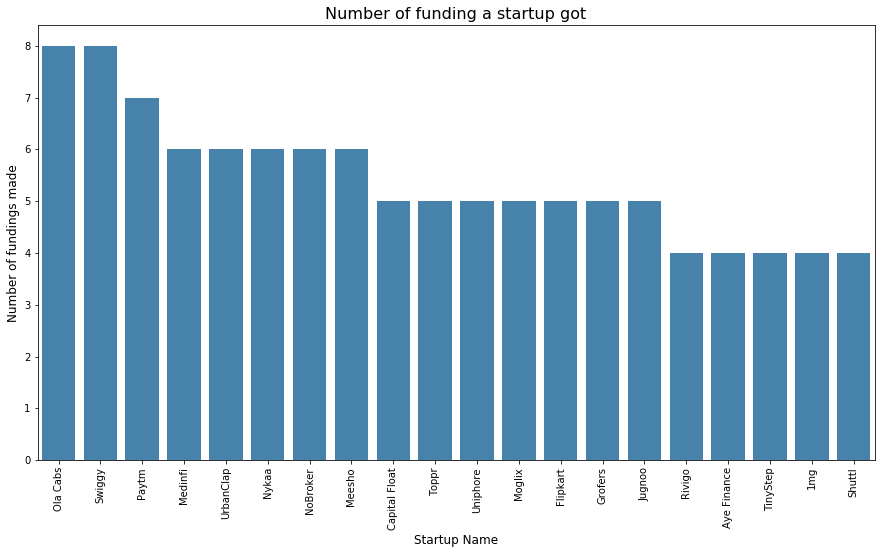

In [15]:
print("Total startups funded : ", len(funding_data["StartupName"].unique()))
print(funding_data["StartupName"].value_counts().head(10))
startupname = funding_data['StartupName'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

As we can see that **Swiggy** got maximum number of fundings(Total funding = 7) and total there are 2001 indian startups funded from January 2015 to August 2017. The above visulization is only for Top 20 startups.

## Ques 3 :  Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64


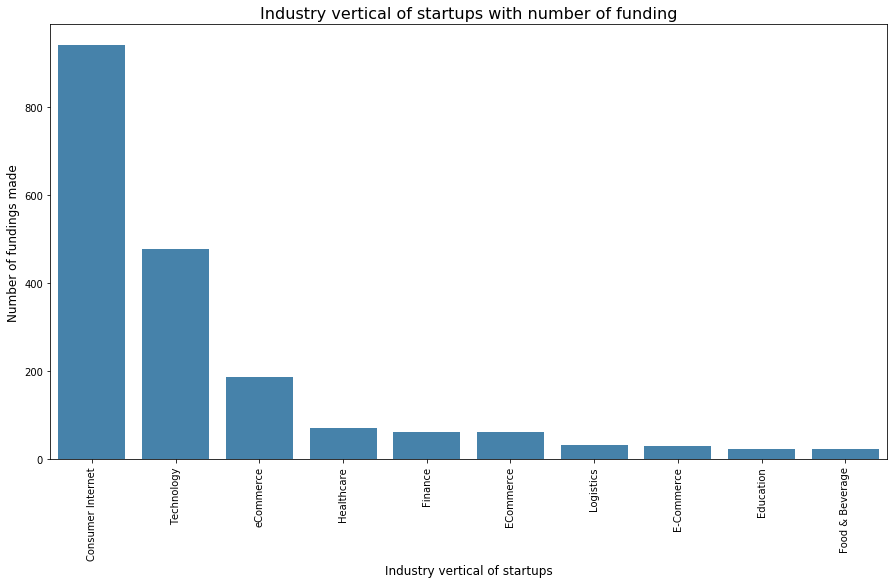

In [16]:
industry = funding_data['Industry Vertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

If we see Above **"Consumer Internet" **got maximum number of funding = 772 followed by technology and E-Commerce.

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Education                         5
Online Education Platform         5
Online Lending                    5
Online Learning Platform          5
Online lending platform           5
Online Food Delivery              4
Non-Banking Financial Company     4
Name: SubVertical, dtype: int64


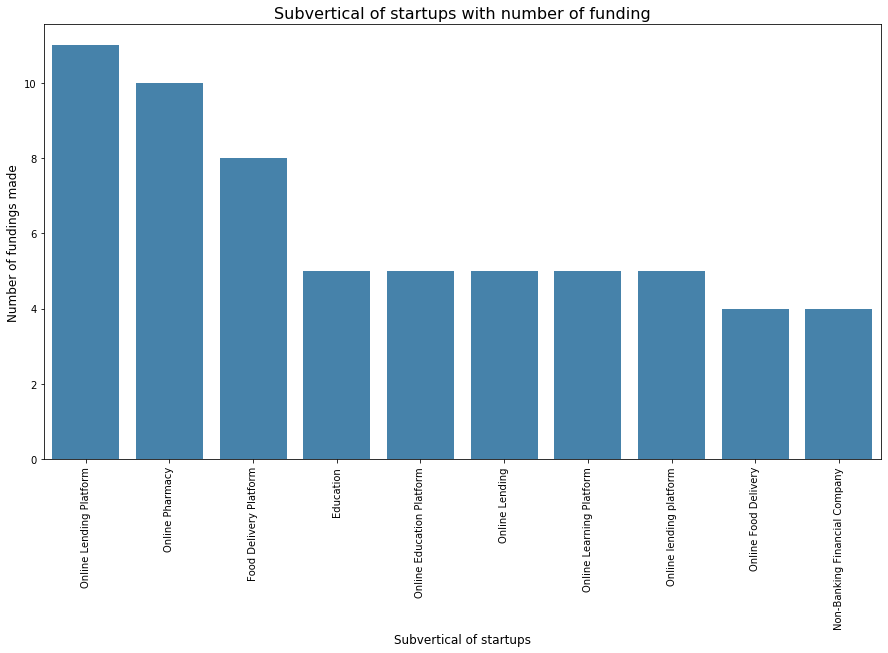

In [17]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In Subcategores, **"Online Phamacy"** got maximim number of fundings.

## Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?


Bangalore    700
Mumbai       567
New Delhi    421
Gurgaon      283
Bengaluru    140
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      49
Name: CityLocation, dtype: int64


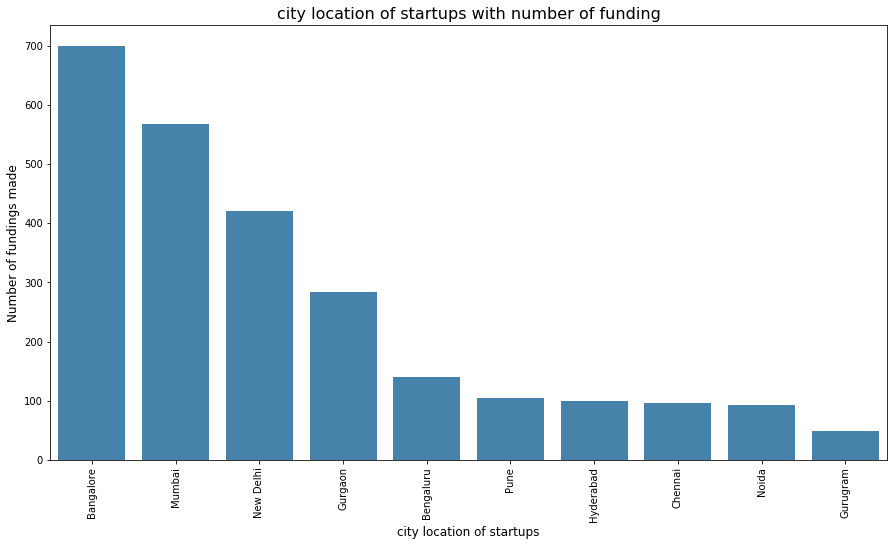

In [18]:
city = funding_data['CityLocation'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

**Distribution of startups across Top different cities**

Text(0.5, 1.0, 'Distribution of Startups across Top cities')

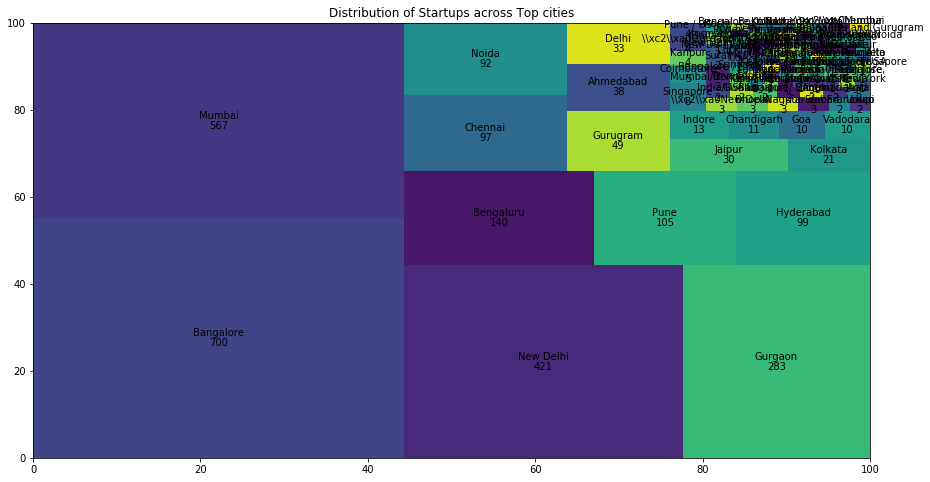

In [19]:
plt.figure(figsize=(15,8))
count = funding_data['CityLocation'].value_counts()
squarify.plot(sizes=count.values,label=count.index, value=count.values)
plt.title('Distribution of Startups across Top cities')

We can see **Bangalore** attracts more number of investotrs followed by **Mumbai** and **New** **Delhi**

## Ques 5 : Who is the important investors in the Indian Ecosystem?


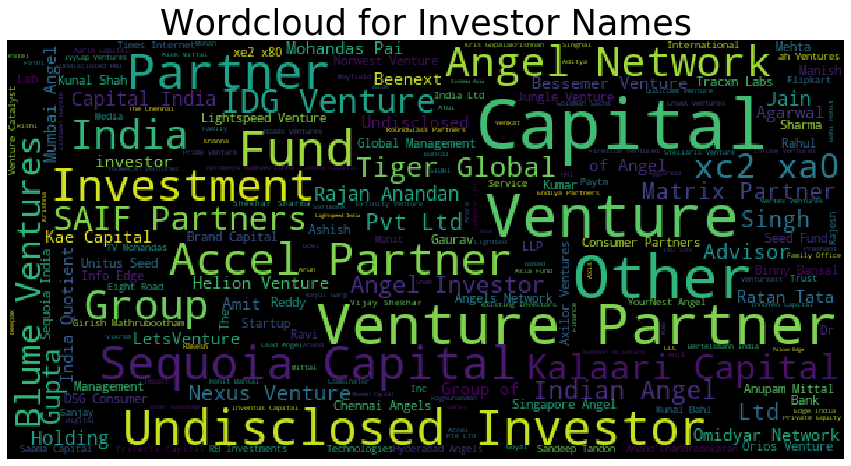

In [20]:
from wordcloud import WordCloud

names = funding_data["Investors Name"][~pd.isnull(funding_data["Investors Name"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [21]:
funding_data['Investors Name'][funding_data['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['Investors Name'][funding_data['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['Investors Name'][funding_data['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['Investors Name'][funding_data['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['Investors Name'][funding_data['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['Investors Name'][funding_data['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'


Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
RoundGlass Partners          10
Name: Investors Name, dtype: int64


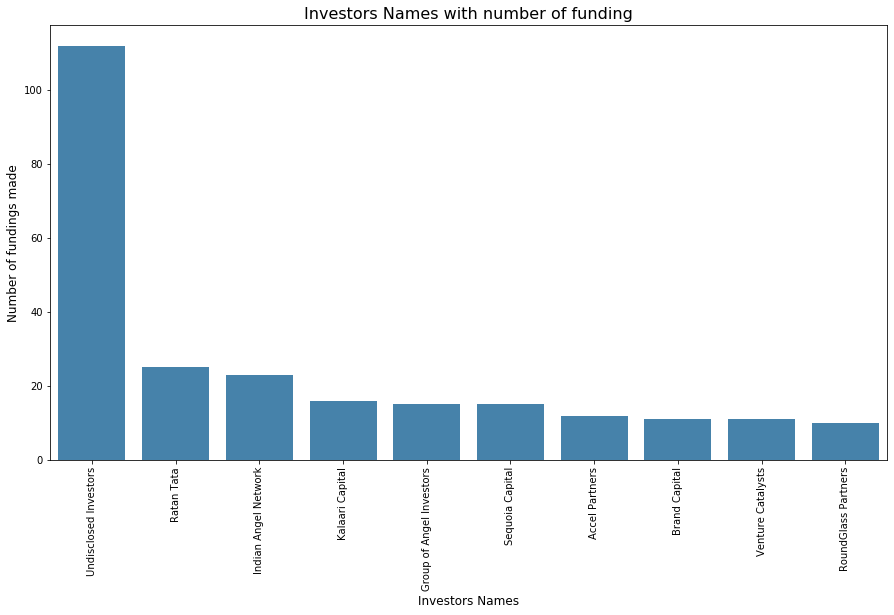

In [22]:
investors = funding_data['Investors Name'].value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

**Indian Angel network **and** Ratan tata** funded maximum number of startups followed by **Kalaari Caitals**.

## Ques 6 : What are different types of funding for startups ?

In [23]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)

Private Equity                 1356
Seed Funding                   1354
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Seed/Angel Funding               23
Series A                         22
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Private Equity Round              4
Seed                              4
Pre-Series A                      4
Seed / Angle Funding              3
pre-Series A                      2
Venture Round                     2
Series E                          2
Series F                          2
Equity                            2
Pre-series A                      1
Angel                             1
Private Funding                   1
Angel Round                       1
Private\\nEquity                  1
Series H                    

In [24]:
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentType'][funding_data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'


Private Equity                 1357
Seed Funding                   1354
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Debt Funding                     25
Seed/Angel Funding               23
Series A                         22
Series B                         20
Series C                         14
Series D                         12
Angel / Seed Funding              8
Seed Round                        7
Private Equity Round              4
Pre-Series A                      4
Seed                              4
Seed / Angle Funding              3
Series E                          2
Series F                          2
Venture Round                     2
Equity                            2
Crowd Funding                     2
pre-Series A                      2
Pre-series A                      1
Angel                             1
Private Funding                   1
Angel Round                       1
Private\\nEquity            

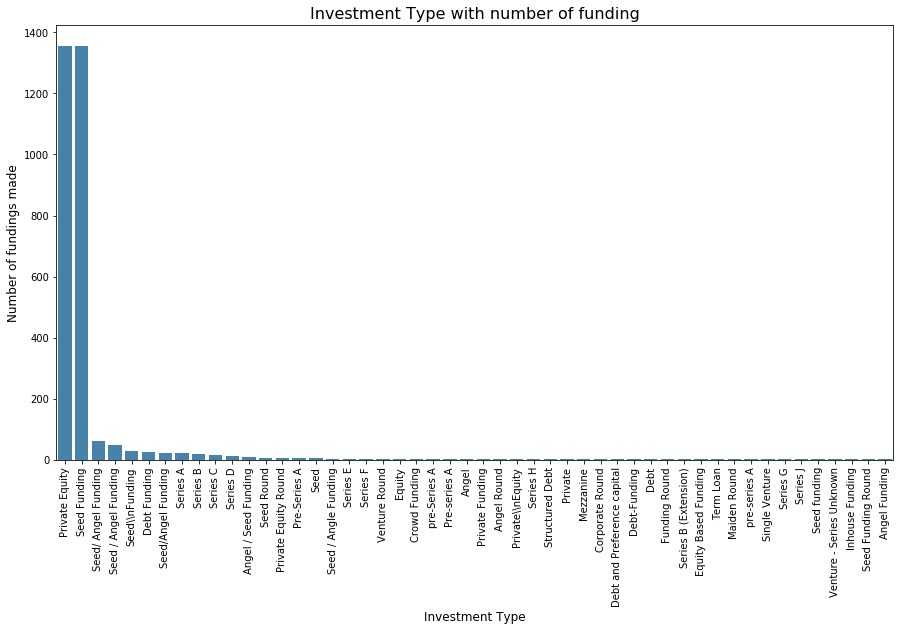

In [25]:
investment = funding_data['InvestmentType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [26]:
temp = funding_data["InvestmentType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

# We can infer that the  **Seed Funding** is major followed by Private Equity.